# Script to read MEOP tag data from a given netCDF file

In [5]:
import sys
sys.path.append("../")

import read_ncArgo as meop
import matplotlib.pyplot as plt
import cmocean as cm

## Load data and metadata

In [6]:
# local filename
deployment = 'ct107'
smru_name = 'ct107-933-13'
qf = 'all'
namefile = smru_name+'_'+qf+'_prof.nc'
ds = meop.open_dataset(namefile)
ds

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_INTERP: 1000, N_LEVELS: 16, N_PARAM: 4, N_PROF: 202)
Coordinates:
  * N_CALIB                       (N_CALIB) int64 0
  * N_INTERP                      (N_INTERP) int64 0 1 2 3 4 ... 996 997 998 999
  * N_LEVELS                      (N_LEVELS) int64 0 1 2 3 4 ... 11 12 13 14 15
  * N_PARAM                       (N_PARAM) int64 0 1 2 3
  * N_PROF                        (N_PROF) int64 0 1 2 3 4 ... 198 199 200 201
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    INST_REFERENCE                (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) object 2014-02-03 08:20:00 ... 201...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) object 2014-02-03 08:20:00 ... 201...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PROFILE_CHLA_QC               (N_PROF) object ...
    CHLA                          (N_PROF, N_LEVELS) float32 ...
    CHLA_QC                       (N_PROF, N_LEVELS) object ...
    CHLA_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    CHLA_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    CHLA_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    PRES_INTERP                   (N_PROF, N_INTERP) float32 ...
    TEMP_INTERP                   (N_PROF, N_INTERP) float32 ...
    PSAL_INTERP                   (N_PROF, N_INTERP) float32 ...
Attributes:
    comment:                   
    pi_name:                  COSTA
    data_type:                Marine animals profile data
    format_version:           1.1
    date_update:              2021-11-24T21:26:00

In [3]:
ds['LATITUDE'].round(4)

<xarray.DataArray 'LATITUDE' (N_PROF: 202)>
array([37.1927, 37.2279, 37.3049, 37.3046, 37.3153, 37.5778, 37.6955,
       37.8811, 37.9848, 38.1926, 38.317 , 38.4751, 38.5633, 38.8116,
       38.9966, 39.1041, 39.2192, 39.3354, 39.4499, 39.4734, 39.7585,
       39.8377, 40.0966, 40.1168, 40.2019, 40.3606, 40.4698, 40.8591,
       41.0573, 41.1706, 41.5062, 41.544 , 41.5808, 41.9122, 41.9686,
       41.9138, 42.0228, 42.2317, 42.3155, 42.4329, 42.4992, 42.4926,
       42.8001, 42.9585, 43.0085, 43.0767, 43.1969, 43.3502, 43.5672,
       43.7167, 43.7656, 43.8711, 44.1225, 44.23  , 44.4524, 44.6011,
       44.7057, 44.8998, 44.8941, 44.8517, 44.8685, 44.7317, 44.7787,
       44.8408, 44.8542, 44.9777, 45.2211, 45.2827, 45.3152, 45.4664,
       45.4796, 45.5421, 45.5231, 45.5355, 45.5587, 45.5903, 45.6387,
       45.7095, 45.7001, 45.7522, 45.766 , 45.7357, 45.731 , 45.7678,
       45.7921, 45.8646, 45.8612, 45.8366, 45.8362, 45.8716, 45.9168,
       45.9714, 46.0943, 46.1846, 46.1879, 46.3199, 46.4612, 46.4496,
       46.5777, 46.7454, 46.8326, 46.9183, 47.1156, 47.1563, 47.4894,
       47.5209, 47.4898, 47.3922, 47.2437, 47.1121, 46.9619, 46.8193,
       46.6245, 46.5673, 46.7465, 46.9233, 46.9378, 46.9686, 47.0955,
       47.2157, 47.3261, 47.4506, 47.47  , 47.7209, 47.6804, 47.5902,
       47.4723, 47.3154, 47.2793, 47.3646, 47.3904, 47.2251, 47.2552,
       47.2341, 47.322 , 47.3588, 47.124 , 47.102 , 47.0847, 46.9112,
       46.9583, 47.0029, 47.0365, 46.9884, 46.8349, 46.7693, 46.7179,
       46.5376, 46.6245, 46.5447, 46.4509, 46.4572, 46.34  , 46.1955,
       46.1223, 46.0414, 45.9046, 45.6987, 45.6181, 45.5417, 44.6985,
       44.6011, 44.4781, 44.1372, 44.065 , 43.9868, 43.8492, 43.1844,
       42.8776, 42.7283, 42.5976, 42.3736, 42.3267, 42.202 , 42.165 ,
       42.1103, 42.0795, 41.9126, 41.9034, 41.7992, 41.5168, 41.5045,
       41.2268, 40.9381, 40.8001, 40.4841, 40.4403, 40.3563, 40.2181,
       40.0561, 39.9682, 39.9095, 39.8727, 39.7773, 39.6623, 39.5732,
       39.3234, 39.0538, 38.7045, 38.4615, 38.0069, 37.875 ])
Coordinates:
  * N_PROF   (N_PROF) int64 0 1 2 3 4 5 6 7 ... 194 195 196 197 198 199 200 201

In [4]:
# If the file is given in the standard MEOP arborescence, the filename can be retrived with:
#import meop_filenames
#namefile = meop_filenames.fname_prof(smru_name,deployment,qf)

In [5]:
ds.list_metadata()

,DEPLOYMENT_CODE,SMRU_PLATFORM_CODE,CYCLE_NUMBER,JULD,LATITUDE,LONGITUDE,N_TEMP,N_PSAL,N_CHLA,MASK
0,ct107,ct107-933-13,1,2014-02-03 08:20:00,37.1927,-122.7000,16.0,16.0,NaN,North Pacific
1,ct107,ct107-933-13,2,2014-02-03 19:10:00,37.2279,-123.1334,16.0,16.0,NaN,North Pacific
2,ct107,ct107-933-13,3,2014-02-04 18:00:00,37.3049,-124.2976,16.0,16.0,NaN,North Pacific
3,ct107,ct107-933-13,4,2014-02-05 03:10:00,37.3046,-124.6125,16.0,16.0,NaN,North Pacific
4,ct107,ct107-933-13,5,2014-02-05 07:10:00,37.3153,-124.8834,8.0,8.0,NaN,North Pacific
...,...,...,...,...,...,...,...,...,...,...
197,ct107,ct107-933-13,198,2014-04-18 16:19:59,39.0538,-123.7800,16.0,16.0,NaN,North Pacific
198,ct107,ct107-933-13,199,2014-04-19 01:19:59,38.7045,-124.0344,16.0,16.0,NaN,North Pacific
199,ct107,ct107-933-13,200,2014-04-19 07:19:59,38.4615,-123.8135,8.0,8.0,NaN,North Pacific
200,ct107,ct107-933-13,201,2014-04-20 03:00:00,38.0069,-123.3001,16.0,16.0,NaN,North Pacific


## Compute derived variables

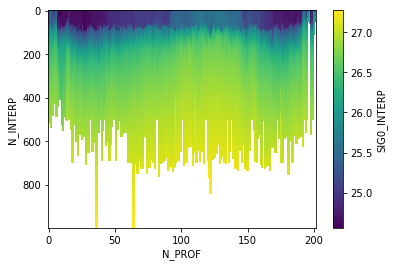

In [6]:
ds.add_sigma0('_INTERP').SIG0_INTERP.T.plot(yincrease=False)

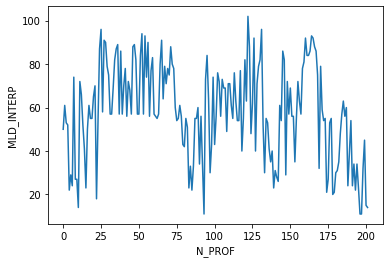

In [7]:
# compute MLD
ds.add_mld('_INTERP').MLD_INTERP.plot()

(200.0, 0.0)

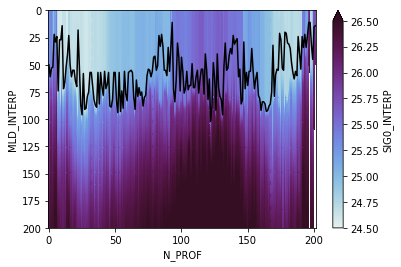

In [8]:
ds.add_sigma0('_INTERP').SIG0_INTERP.T.plot(yincrease=False,vmin=24.5,vmax=26.5,cmap=cm.cm.dense)
ds.add_mld('_INTERP').MLD_INTERP.plot(color='k')
plt.ylim([200,0])

## plot data summary

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9cfe10f10>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9cfd9c7d0>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9dc920490>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9dc91b390>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb9dc912390>})

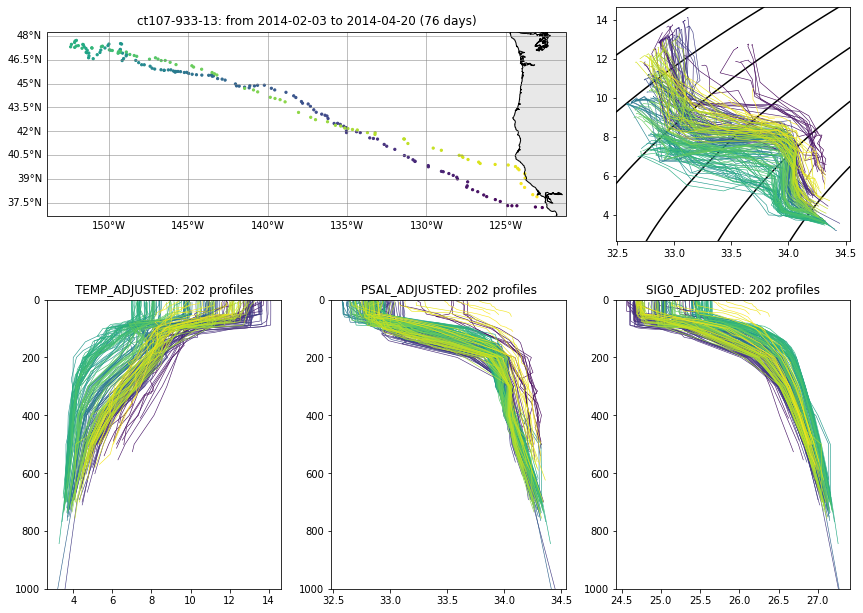

In [10]:
ds.plot_data_tags()

## Plot geographic map

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb9dca1fb10>)

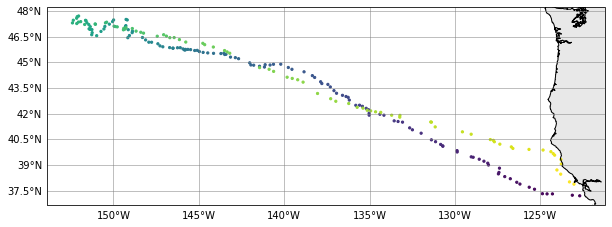

In [11]:
ds.plot_map()

# plot vertical profiles

(<Figure size 720x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9d1fd87d0>,
       dtype=object))

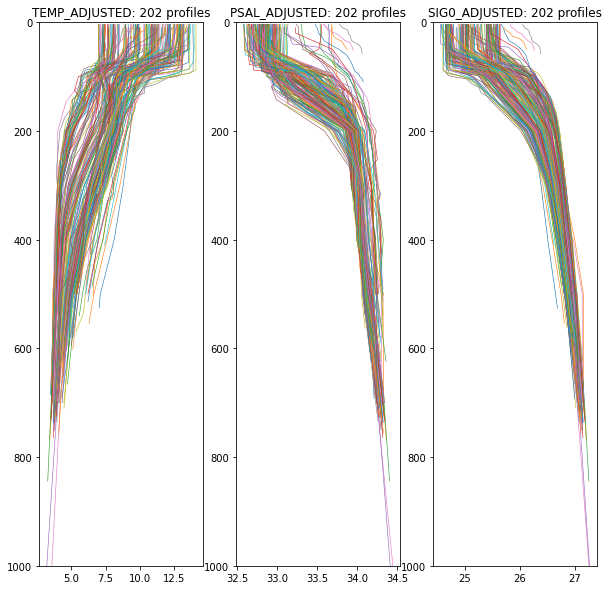

In [12]:
ds.plot_profiles(['TEMP','PSAL','SIG0'])

## plot TS profile

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d1fd8e50>)

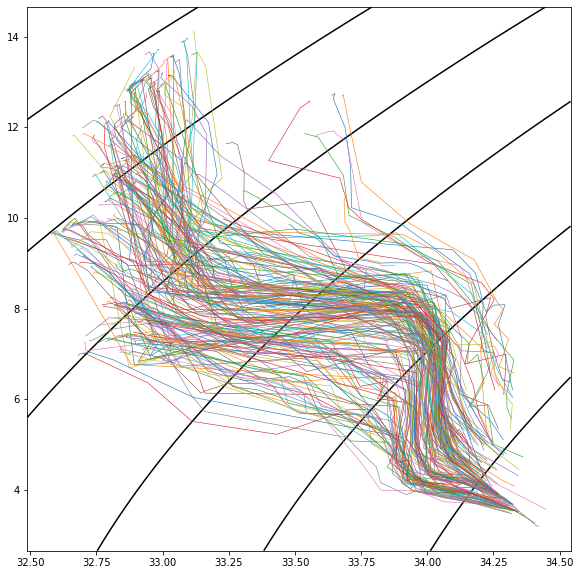

In [13]:
ds.plot_TSdiag()

# plot TS section

(<Figure size 720x720 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9d14b1cd0>,
       dtype=object))

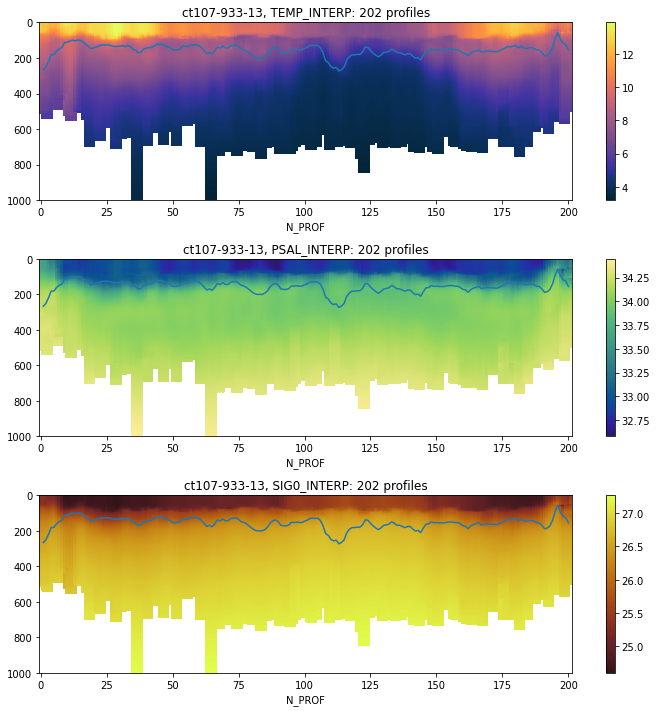

In [14]:
ds.plot_sections(['TEMP','PSAL','SIG0'],rolling=4,density_threshold=0.03)

# select a subset of profiles

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d12d40d0>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d120b990>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d11c0ed0>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d1182410>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb9d11b7a50>})

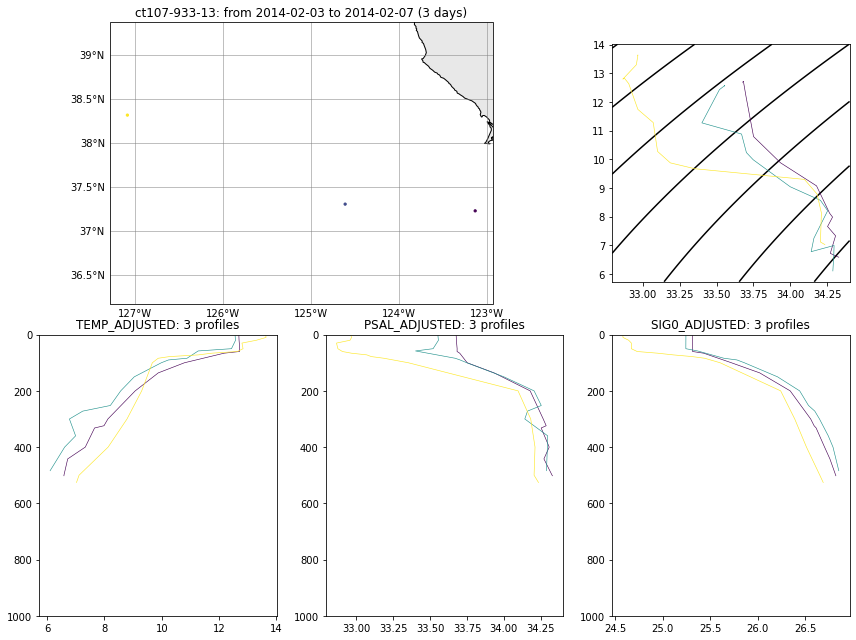

In [15]:
index_subset = [1,3,10]
ds.isel({'N_PROF':index_subset}).plot_data_tags()

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d105b750>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d102e150>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d0fe2510>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d0f99950>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb9d0f4ced0>})

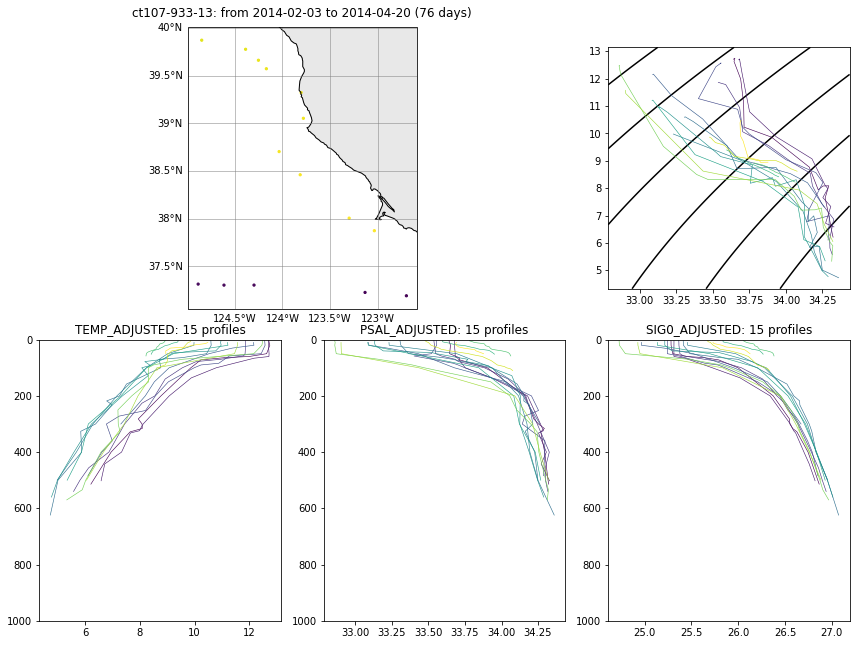

In [16]:
condition = ds.LONGITUDE>-125
ds.isel({'N_PROF':condition}).plot_data_tags()